### Text Classification

+ assigning text to their predefined category or class
+ grouping text into their classes

  
+ Predict the subject / category of project
  
### Workflow
+ EDA
+ Building Features from the Text
  - Vectorization (Tfidf, CounterVectorizer)

+ Model Building
  - Single Approach
  - Pipeline Approach

+ Model Evaluation
+ Model Interpretation
+ Productionize Model 

In [1]:
# Load packages

import pandas as pd
import numpy as np
import neattext.functions as nfx

import seaborn as sns
import fitz  # PyMuPDF

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
pdf = "Volume-1.pdf"
doc = fitz.open(pdf)

Report = ""

# Loop through each page and extract text
for page in doc:
    page_text = page.get_text()
    raw_text = page_text.replace('\n', ' ')  # Remove line breaks
    Report += raw_text   # Adds no a space between pages

doc.close()

### Text Preprocessing

+ Reduce Noise
    - Punctuation
    - Special character
    - Stopword
+ Lemmatization
+ Stemming

In [4]:
# dir(nfx)

In [5]:
from nltk.tokenize import sent_tokenize

# Sentence chunking using NLTK 
sentences = sent_tokenize(Report)
clean_sentences = [s.strip() for s in sentences if len(s.strip()) > 30]

df = pd.DataFrame({'text': clean_sentences})

df.head()


,text
0,"A INSURANCE CASES DIGEST - VOLUME 1, 2024 Edit..."
1,LEADS INSURANCE LIMITED V INSURANCE REGULATO...
2,INSURANCE COMPANY OF EAST AFRICA vs KITAGEND...
3,ATTORNEY GENERAL VERSUS NIKO INSURANCE UGAND...
4,ISAAC KATONGOLE VERSUS EXCEL INSURANCE COMPA...


In [6]:
#  CATEGORIES

# Step 1: Define keywords
keywords = {"fraud": ["fraud", "fraudulent", "fake", "forgery", "dishonest",
        "deception", "conspiracy", "collusion", "steal", "fraudulently"],
    
    "misrepresentation": ["misrepresentation", "misrepresent", "false information",
        "incorrect information", "deceive", "mislead", "ambiguous", "not clear", "vague"],
            
    "claims procedure": ["claim", "claims", "repudiate", "repudiation", "decline",
        "assessment", "delay", "investigation", "settlement"],

    "indemnity": ["pay out", "liability attaches", "pay the claim", "payable", "payment",
        "directed to pay", "indemnify"],
            
    "non-disclosure": ["non-disclosure", "non disclosure", "nondisclosure",
        "failed to disclose", "not disclosed", "conceal", "concealment"]}

# Step 2: Function to assign a category to each sentence
def classify_sentence(sentence):
    text = sentence.lower()
    for category, kw_list in keywords.items():   
        for kw in kw_list:
            if kw in text:
                return category
    return "Miscellaneuous"

# Step 3: Apply classification to your DataFrame
df["category"] = df["text"].apply(classify_sentence)

df.head(10)

,text,category
0,"A INSURANCE CASES DIGEST - VOLUME 1, 2024 Edit...",Miscellaneuous
1,LEADS INSURANCE LIMITED V INSURANCE REGULATO...,Miscellaneuous
2,INSURANCE COMPANY OF EAST AFRICA vs KITAGEND...,Miscellaneuous
3,ATTORNEY GENERAL VERSUS NIKO INSURANCE UGAND...,Miscellaneuous
4,ISAAC KATONGOLE VERSUS EXCEL INSURANCE COMPA...,Miscellaneuous
5,MICROCARE INSURANCE LTD VERSUS INSURANCE REG...,Miscellaneuous
6,COMPLAINANT 1 & COMPLAINANT 2 Vs. Jubilee AL...,Miscellaneuous
7,COMPLAINANT V SANLAM GENERAL INSURANCE COMPA...,Miscellaneuous
8,COMPLAINANT V SANLAM GENERAL INSURANCE COMPA...,Miscellaneuous
9,COMPLAINANT Vs. LIBERTY GENERAL INSURANCE UG...,Miscellaneuous


In [7]:
# Remove stopwords, special characters and emails

df['clean_text'] = df['text'].apply(lambda x: nfx.remove_stopwords(nfx.remove_special_characters(nfx.remove_emails(x))))
df['clean_text']

0      INSURANCE CASES DIGEST VOLUME 1 2024 Editorial...
1      LEADS INSURANCE LIMITED V INSURANCE REGULATORY...
2      INSURANCE COMPANY EAST AFRICA vs KITAGENDA MUH...
3      ATTORNEY GENERAL VERSUS NIKO INSURANCE UGANDA ...
4      ISAAC KATONGOLE VERSUS EXCEL INSURANCE COMPANY...
                             ...                        
981    f parties agree bureau makes necessary recomme...
982                         unsatisfied bureaus decision
983    unsatisfied lodge ap peal Insurance Appeals Tr...
984    64 INSURANCE REGULATORY AUTHORITY UGANDA IRA U...
985    Box 22855 Kampala Uganda Tel 256 417 425 500 2...
Name: clean_text, Length: 986, dtype: object

In [8]:
df['clean_text'] = df['clean_text'].str.lower()
df[['clean_text' , 'text']].head(3)

,clean_text,text
0,insurance cases digest volume 1 2024 editorial...,"A INSURANCE CASES DIGEST - VOLUME 1, 2024 Edit..."
1,leads insurance limited v insurance regulatory...,LEADS INSURANCE LIMITED V INSURANCE REGULATO...
2,insurance company east africa vs kitagenda muh...,INSURANCE COMPANY OF EAST AFRICA vs KITAGEND...


### Building features from the Text

+ Convert words to vector of number
+ Tfidf
+ Count
+ Hashvec

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [10]:
Xfeatures = df['clean_text']
ylabels = df['category']

In [11]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [12]:
X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.17633615, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [13]:
df_vec = pd.DataFrame(X.todense(), columns=tfidf_vec.get_feature_names_out())
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,976,977,978,979,980,981,982,983,984,985
0176,0.0,0.0,0.0,0.0,0.200618,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0800,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176336
0800124124,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
100000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
years,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
yellow,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
yes,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Build Models

+ Single Approach*
    - Separately
+ Pipeline
    - Combine

In [14]:
# Split data

from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(788, 2775)

In [17]:
# Build Model

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
# Accuracy

model.score(X_test, y_test)

0.8787878787878788

## Evaluate model

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [20]:
y_pred = model.predict(X_test)

In [21]:
# Confusion matrix; true pos, false pos
confusion_matrix(y_pred, y_test)

array([[156,  13,   3,   6,   1],
       [  0,  18,   1,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [22]:
df["category"].unique()

array(['Miscellaneuous', 'misrepresentation', 'fraud', 'claims procedure',
       'indemnity', 'non-disclosure'], dtype=object)

In [23]:
label_names = ["fraud", "misrepresentation", "claims procedure", "non-disclosure", "indemnity"]


In [24]:
import matplotlib.pyplot as plt

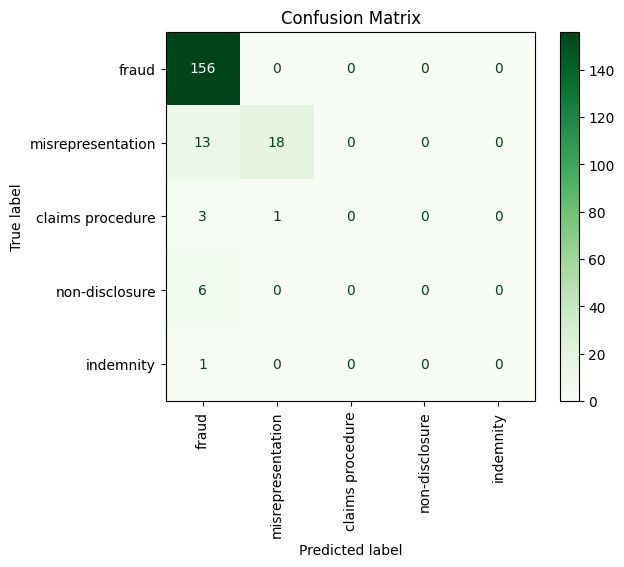

In [25]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap="Greens", xticks_rotation=90)

plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))

                   precision    recall  f1-score   support

   Miscellaneuous       0.87      1.00      0.93       156
 claims procedure       0.95      0.58      0.72        31
            fraud       0.00      0.00      0.00         4
        indemnity       0.00      0.00      0.00         6
misrepresentation       0.00      0.00      0.00         1

         accuracy                           0.88       198
        macro avg       0.36      0.32      0.33       198
     weighted avg       0.83      0.88      0.85       198



In [27]:
# Making a single prediction

example = "Efficiency in settling claims"

In [28]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [29]:
vectorize_text(example)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [30]:
sample1 = vectorize_text(example)

In [31]:
model.predict(sample1)

array(['claims procedure'], dtype=object)

In [32]:
# Prediction probability
model.predict_proba(sample1)

array([[0.15864857, 0.7716233 , 0.03327251, 0.01588261, 0.01792499,
        0.00264801]])

In [33]:
model.classes_

array(['Miscellaneuous', 'claims procedure', 'fraud', 'indemnity',
       'misrepresentation', 'non-disclosure'], dtype=object)

### Model interpretation
+ Eli5
+ Lime
+ Shap

In [34]:
# Load model interpackage
import eli5

In [35]:
# Weights of each prediction
eli5.show_weights(model)

In [36]:
# ACtual word ofthe features
eli5.show_weights(model, feature_names=tfidf_vec.get_feature_names_out())

In [37]:
eli5.show_prediction(model, example, vec=tfidf_vec) 

In [38]:
# Test/predict with new sentences

example2 = "To fulfill its mandate effectively, the Authority established the Complaints Bureau, which has undertaken several initiatives, including the development and publication of the Insurance Cases Digest."

In [39]:
model.predict(vectorize_text(example2))

array(['Miscellaneuous'], dtype=object)

In [40]:
eli5.show_prediction(model, example2, vec=tfidf_vec) 

In [41]:
# Save Model
import joblib

In [42]:
model_file = open("linear_model.pkl", "wb")
joblib.dump(model, model_file)
model_file.close()

## Author

<a href="https://www.linkedin.com/in/andrew-kalumba-harris/">Andrew Kalumba</a><br>
<a href =""> </a>


| Date (YYYY-MM-DD) | Prepared By     | 
| ----------------- | --------------  | 
| 2025-11-21        | Author          | 


## <h3 align="center"> © Data Science 2025. <h3/>